In [49]:
#import libraries 
import pandas as pd 
import numpy as np 
import calendar 
from datetime import datetime
from datetime import date
import matplotlib.pyplot as plt 
import seaborn as sn 
%matplotlib inline

In [50]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
#load in the data

In [6]:
train.shape,test.shape
#shape of training and testing data

((12980, 12), (4399, 11))

In [7]:
#printing rows of train 
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 0:00:00,1,0,0,1,9.84,14.395,81.0,0.0,3,13,16
1,2011-01-01 1:00:00,1,0,0,1,9.02,13.635,80.0,0.0,8,32,40
2,2011-01-01 2:00:00,1,0,0,1,9.02,13.635,80.0,0.0,5,27,32
3,2011-01-01 3:00:00,1,0,0,1,9.84,14.395,75.0,0.0,3,10,13
4,2011-01-01 4:00:00,1,0,0,1,9.84,14.395,75.0,0.0,0,1,1


In [8]:
#print the first five rows of test dataset 
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered
0,2012-06-30 1:00:00,3,0,0,3,26.24,28.790,89.0,15.0013,3,55
1,2012-06-30 2:00:00,3,0,0,2,26.24,28.790,89.0,0.0000,7,54
2,2012-06-30 3:00:00,3,0,0,2,26.24,28.790,89.0,0.0000,3,20
3,2012-06-30 4:00:00,3,0,0,2,25.42,27.275,94.0,0.0000,3,15
4,2012-06-30 5:00:00,3,0,0,1,26.24,28.790,89.0,11.0014,3,7


In [9]:
#columns in the dataset 
train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [10]:
test.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered'],
      dtype='object')

In [11]:
train.dtypes 
#datatypes of the columns 

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity      float64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

all numerical values 

# Univariate Analysis 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


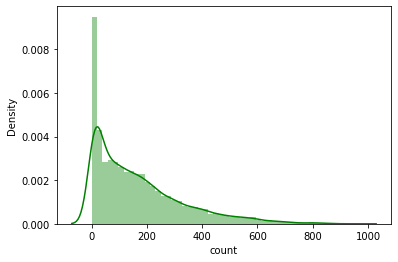

In [18]:
#distribution of the count variable 
sn.distplot(train["count"],color="green")

taking log of variabel and dist is at right and see the if the dist becomes normal

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


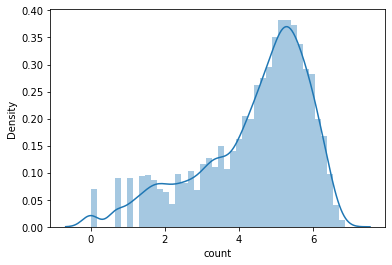

In [27]:
sn.distplot(np.log(train["count"]))


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


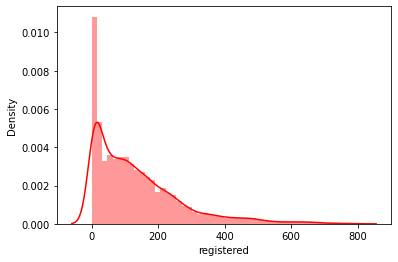

In [36]:
sn.distplot(train["registered"],color="red")
#distribution of registered variable to check the number of registered user rentals initiated.

Bivariate Analysis 

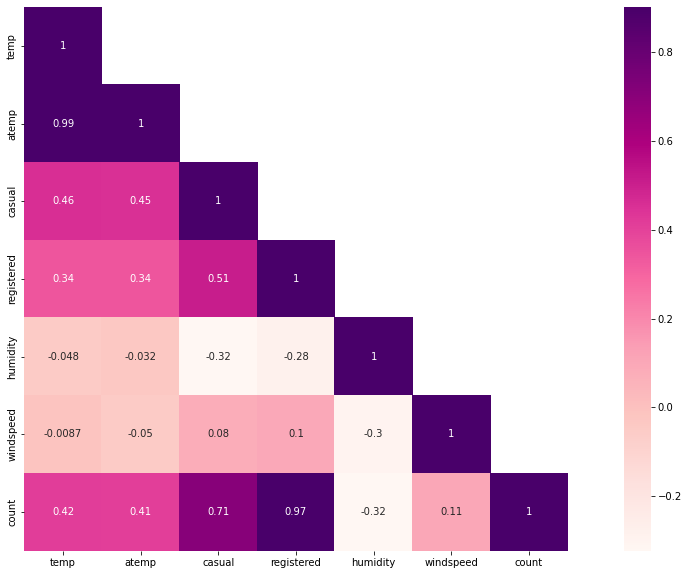

In [33]:
#looking at the correlation between numerical variables 
corr = train[["temp","atemp","casual","registered","humidity","windspeed","count"]].corr()
#create obj for correlation corr 
mask = np.array(corr)
mask[np.tril_indices_from(mask)]=False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sn.heatmap(corr,mask=mask,vmax=.9,square=True,annot=True,cmap="RdPu")

temp and humidity have +ve and -ve corr with count resptively. but no prominent as count still got the dependaency on temp and humidity 

windspeed will not be really useful numerical feature and it is visible from it correlation value with "count"

"atemp" and "temp" has got strong correlation with each other,

In [37]:
#looking for the missing values in the dataset 
train.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

No missing values 

In [38]:
#for test 
test.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
dtype: int64

no missing values so first model // extraction of the new features using the datetime // date, hour, month 

In [51]:
#extracting the data, hour and month from the datetime 
train["date"] = train.datetime.apply(lambda x : x.split()[0])
train["hour"] = train.datetime.apply(lambda x : x.split()[1].split(":")[0])
train["month"] = train.date.apply(lambda dateString : datetime.strptime(dateString,"%Y-%m-%d").month)

In [52]:
test["date"] = test.datetime.apply(lambda x : x.split()[0])
test["hour"] = test.datetime.apply(lambda x : x.split()[1].split(":")[0])
test["month"] = test.date.apply(lambda dateString : datetime.strptime(dateString,"%Y-%m-%d").month)

In [53]:
training = train[train['datetime']<='2012-03-30 0:00:00']
validation = train[train['datetime']>'2012-03-30 0:00:00']

In [54]:
train = train.drop(['datetime','date', 'atemp'],axis=1)
test = test.drop(['datetime','date', 'atemp'], axis=1)
training = training.drop(['datetime','date', 'atemp'],axis=1)
validation = validation.drop(['datetime','date', 'atemp'],axis=1)

# Model building
Linear Regression Model 

In [55]:
from sklearn.linear_model import LinearRegression

In [57]:
lmodel = LinearRegression()
#initialize the linear regression model 

In [58]:
X_train = training.drop('count', 1)
y_train = np.log(training['count'])
X_val = validation.drop('count', 1)
y_val = np.log(validation['count'])
#dropping the target variable 

In [59]:
#checking the shape of the objs
X_train.shape, y_train.shape, X_val.shape, y_val.shape

((10774, 11), (10774,), (2206, 11), (2206,))

In [61]:
# fitting the model on X_train and y_train
lmodel.fit(X_train,y_train)

LinearRegression()

In [62]:
#making the predictions on validation set 
pred = lmodel.predict(X_val)

In [64]:
#def a func which will return the rmsle score 
def rmsle(y,y_):
  y = np.exp(y) 
  y_ = np.exp(y_)
  log1 = np.nan_to_num(np.array([np.log(v+1) for v in y]))
  log2 = np.nan_to_num(np.array([np.log(v+1) for v in y_]))
  calc = (log1 - log2) ** 2
  return np.sqrt(np.mean(calc))

In [65]:
#cal the rmsle value of the prediction 
rmsle(y_val,pred)

0.8875379204281799

In [66]:
#the predictions from linear regression model and submit these predictions to generate score.
test_prediction = lmodel.predict(test)

We got a rmsle value of 0.8875 on the validation set.

Let's use Decision Tree now. Note that rmsle tells us how far the predictions are from the actual value, so we want rmsle value to be as close to 0 as possible. So, we will further try to reduce this value.

# Decision Tree

In [67]:
from sklearn.tree import DecisionTreeRegressor

In [68]:
# defining a decision tree model with a depth of 5. You can further tune the hyperparameters to improve the score
dt_reg = DecisionTreeRegressor(max_depth=5)

In [69]:
dt_reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5)

In [70]:
predict = dt_reg.predict(X_val)

In [71]:
# calculating rmsle of the predicted values
rmsle(y_val, predict)

0.17102267399446955

In [72]:
test_prediction = dt_reg.predict(test)

In [73]:
final_prediction = np.exp(test_prediction)

In [74]:
submission = pd.DataFrame()

In [75]:
# creating a count column and saving the predictions in it
submission['count'] = final_prediction

In [76]:
submission.to_csv('submission.csv', header=True, index=False)

Save in the submission later copied to the Solution checker 